# Лабораторная работа №3

### Выполнил Новиков Илья Александрович 20-ИВТ-3

### Вариант 41

In [14]:
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # Substract 1 to each output class for friendly 0-based indexing 
    return y_ - 1

y_train_path = DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + TEST + "y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [5]:
x_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, delimiter=r"\s+")
x_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delimiter=r"\s+")
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=0)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)


In [4]:
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>


### 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

In [5]:
len1 = len(x_test)
x_test.drop_duplicates(keep='first',inplace=True)
len2 = len(x_test)
print("Всего удалено дубликатов:" ,len1 - len2)

Всего удалено дубликатов: 0


In [6]:
y_train.head()

,State
0,5
1,5
2,5
3,5
4,5


In [42]:
y_train.shape

(7352, 1)

In [34]:
len(x_train)

7351

1. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

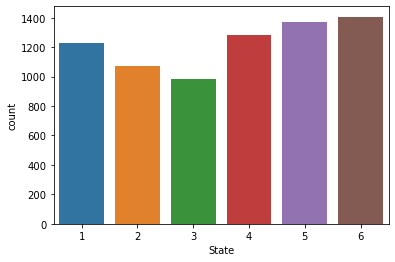

In [46]:
sns.countplot(data=y_train, x='State')
plt.show()

Вывод: классы сбаланисированы

2. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [66]:
normalized_features_train_x = preprocessing.normalize(x_train, axis=0, norm='max')
normalized_features_train_x = pd.DataFrame(normalized_features_train_x)
normalized_features_train_x[6000:6010]

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
6000,0.241397,-0.039097,-0.156477,-0.392338,-0.150609,-0.339848,-0.428254,-0.155930,-0.352302,-0.163517,...,0.203140,0.308202,0.123345,0.172335,0.957737,-0.406822,-0.406713,-0.863778,0.190043,0.039474
6001,0.219051,0.012745,-0.090210,-0.437708,-0.192894,-0.394689,-0.469049,-0.183616,-0.431121,-0.163517,...,-0.028964,-0.292544,-0.678204,0.494458,-0.777335,0.839909,0.596468,-0.861733,0.191173,0.040909
6002,0.314546,0.003091,-0.079625,-0.443819,-0.150673,-0.291282,-0.456789,-0.181451,-0.304442,-0.257059,...,-0.073631,-0.245896,-0.636232,-0.236787,-0.255432,-0.558631,0.066144,-0.871556,0.185138,0.036665
6003,0.337674,-0.027873,-0.119980,-0.390587,-0.155416,-0.230643,-0.405809,-0.191639,-0.241678,-0.214119,...,-0.058052,-0.420551,-0.812429,-0.746296,0.941161,-0.950040,0.554080,-0.879482,0.180595,0.030749
6004,0.413667,0.003216,-0.095723,0.233978,-0.182102,-0.430488,0.177548,-0.193706,-0.462795,0.616404,...,0.092037,-0.321520,-0.624670,-0.660211,0.804284,0.970188,-0.170685,-0.851198,0.200863,0.024096
6005,0.151730,0.025406,-0.061628,0.082140,-0.254069,-0.501270,0.013164,-0.300131,-0.517902,0.346894,...,0.159112,-0.637165,-0.872024,0.561992,-0.427495,0.987103,0.597001,-0.880906,0.180114,0.026498
6006,0.355497,-0.038700,-0.141148,0.130041,-0.022926,-0.301756,0.055973,-0.100110,-0.362562,0.488870,...,0.192404,-0.495234,-0.791217,-0.556787,-0.928519,0.979858,-0.930932,-0.897747,0.168434,0.026398
6007,0.318773,-0.024833,-0.106193,0.185212,-0.041545,-0.244454,0.113485,-0.135644,-0.298483,0.498384,...,0.195449,-0.552525,-0.836422,-0.779915,0.550861,0.715802,-0.610499,-0.888306,0.174239,0.031951
6008,0.155607,-0.001955,-0.105137,0.101411,-0.128039,-0.351193,0.002116,-0.180752,-0.375448,0.498384,...,0.143180,-0.631288,-0.911319,0.893445,0.844360,0.944066,-0.286707,-0.879402,0.181259,0.025353
6009,0.347238,-0.039452,-0.163717,0.200643,-0.094887,-0.356238,0.101551,-0.110068,-0.377756,0.527113,...,0.235856,-0.622430,-0.896469,-0.412976,-0.823482,-0.790756,-0.734881,-0.875553,0.184089,0.022927


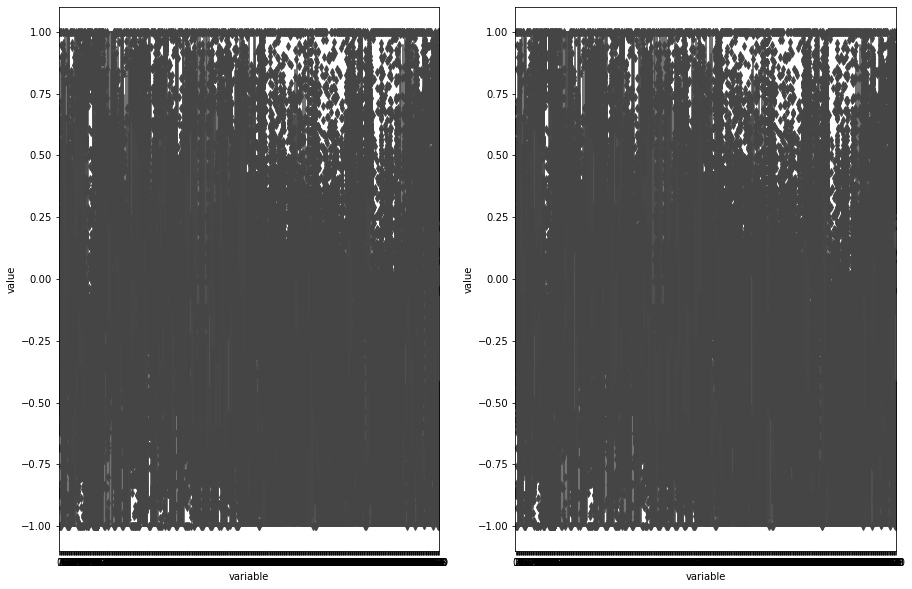

In [67]:
# Диаграммы BoxPlot до и после масштабирования для тренировочной выборки.
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(x_train), ax=axes[0])#для 1го поля вывода области графика
sns.boxplot(x="variable", y="value", data=pd.melt(normalized_features_train_x), ax=axes[1]);#для 2го поля вывода области графика

In [6]:
# Функция оценки качества классификатора
def evaluate_clf(y_train, y_test, y_pred_train, y_pred_test):
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 4)
    precision_train = round(precision_score(y_train, y_pred_train, average='macro'), 4)
    recall_train = round(recall_score(y_train, y_pred_train, average='macro'), 4)
    confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

    accuracy_test = round(accuracy_score(y_test, y_pred_test), 4)
    precision_test = round(precision_score(y_test, y_pred_test, average='macro'), 4)
    recall_test = round(recall_score(y_test, y_pred_test, average='macro'), 4)
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

    print(f'TRAIN set: accuracy {accuracy_train}, precision {precision_train}, recall {recall_train} (макроусреднение)')
    print('Confusion matrix: \n', confusion_matrix_train)
    print(f'TEST set: accuracy {accuracy_test}, precision {precision_test}, recall {recall_test} (макроусреднение)')
    print('Confusion matrix: \n', confusion_matrix_test)

In [72]:
kneignors = KNeighborsClassifier()

search = GridSearchCV(kneignors, {'n_neighbors': [x for x in range(1, 20)]})
search.fit(x_train, y_train.values.ravel())

n = search.best_estimator_.n_neighbors
best = search.best_score_
print('best:', best, ', neighbors num:', n, sep=' ')

kneignors = KNeighborsClassifier(n_neighbors=n)
kneignors.fit(x_train, y_train.values.ravel())
knn_predict = kneignors.predict(x_test)

best: 0.9019353764619377 , neighbors num: 16


In [114]:
knn_predict

array([5, 5, 5, ..., 2, 2, 1])

In [115]:
knn_predict_proba = kneignors.predict_proba(x_test)

In [116]:
knn_predict_proba

array([[0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 0.0625, 0.9375, 0.    ],
       [0.    , 0.    , 0.    , 0.0625, 0.9375, 0.    ],
       ...,
       [0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0625, 0.875 , 0.0625, 0.    , 0.    , 0.    ],
       [0.625 , 0.25  , 0.125 , 0.    , 0.    , 0.    ]])

In [87]:
y = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
y_bin_score = label_binarize(knn_predict, classes=[1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [90]:
y

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [89]:
y_bin_score

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [73]:
print(type(accuracy_score))
print('Accuracy knn: %.5f' % accuracy_score(y_test, knn_predict))

<class 'function'>
Accuracy knn: 0.90601


In [122]:
DTC = DecisionTreeClassifier()

DTC_grid = GridSearchCV(DTC, {'max_depth': list(range(1, 6)), 'max_features': list(range(1, 6))})
DTC_grid.fit(x_train, y_train)

best_depth = DTC_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features = DTC_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске

DTC = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
DTC.fit(x_train, y_train)

accuracy_score = np.mean(y_test.values.ravel() == DTC.predict(x_test))
print("Accuracy of DTC model:",  accuracy_score)
print("Best accuracy:", DTC_grid.best_score_)

Accuracy of DTC model: 0.6596538853070919
Best accuracy: 0.6697498577949195


In [157]:
dt_predict_proba = DTC.predict_proba(x_test)

In [10]:
y_pred_train = kneignors.predict(x_train)
y_pred_test = kneignors.predict(x_test)

In [69]:
y_pred_test

array([5, 5, 5, ..., 2, 2, 1])

In [28]:
evaluate_clf(y_train, y_test, y_pred_train, y_pred_test)

TRAIN set: accuracy 0.9683, precision 0.9708, recall 0.9696 (макроусреднение)
Confusion matrix: 
 [[1226    0    0    0    0    0]
 [   6 1067    0    0    0    0]
 [   8    9  969    0    0    0]
 [   0    1    0 1147  133    5]
 [   0    0    0   68 1306    0]
 [   0    0    1    2    0 1404]]
TEST set: accuracy 0.906, precision 0.9112, recall 0.9007 (макроусреднение)
Confusion matrix: 
 [[489   0   7   0   0   0]
 [ 39 426   6   0   0   0]
 [ 51  47 322   0   0   0]
 [  0   4   0 401  86   0]
 [  0   0   0  35 497   0]
 [  0   0   0   1   1 535]]


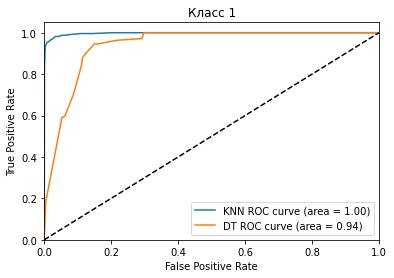

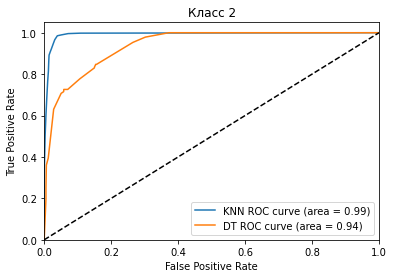

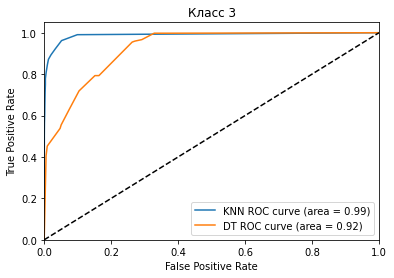

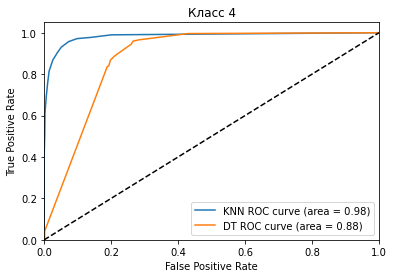

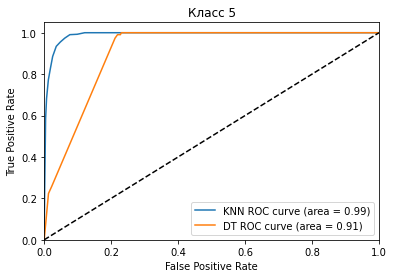

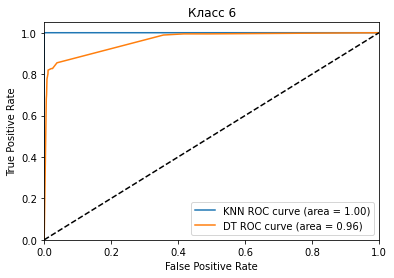

In [158]:
# Compute ROC curve and ROC area for each class
knn_fpr = dict()
knn_tpr = dict()
knn_roc_auc = dict()
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    knn_fpr[i], knn_tpr[i], _ = roc_curve(y[:, i], knn_predict_proba[:, i])
    knn_roc_auc[i] = auc(knn_fpr[i], knn_tpr[i])
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y[:, i], dt_predict_proba[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])


# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(knn_fpr[i], knn_tpr[i], label='KNN ROC curve (area = %0.2f)' % knn_roc_auc[i])
    plt.plot(dt_fpr[i], dt_tpr[i], label='DT ROC curve (area = %0.2f)' % dt_roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

In [159]:
# Compute micro-average ROC curve and ROC area
knn_fpr["micro"], knn_tpr["micro"], _ = roc_curve(y_test.values.ravel(), knn_predict_proba.ravel())
knn_roc_auc["micro"] = auc(knn_fpr["micro"], knn_tpr["micro"])

ValueError: multiclass format is not supported

In [136]:
from itertools import cycle

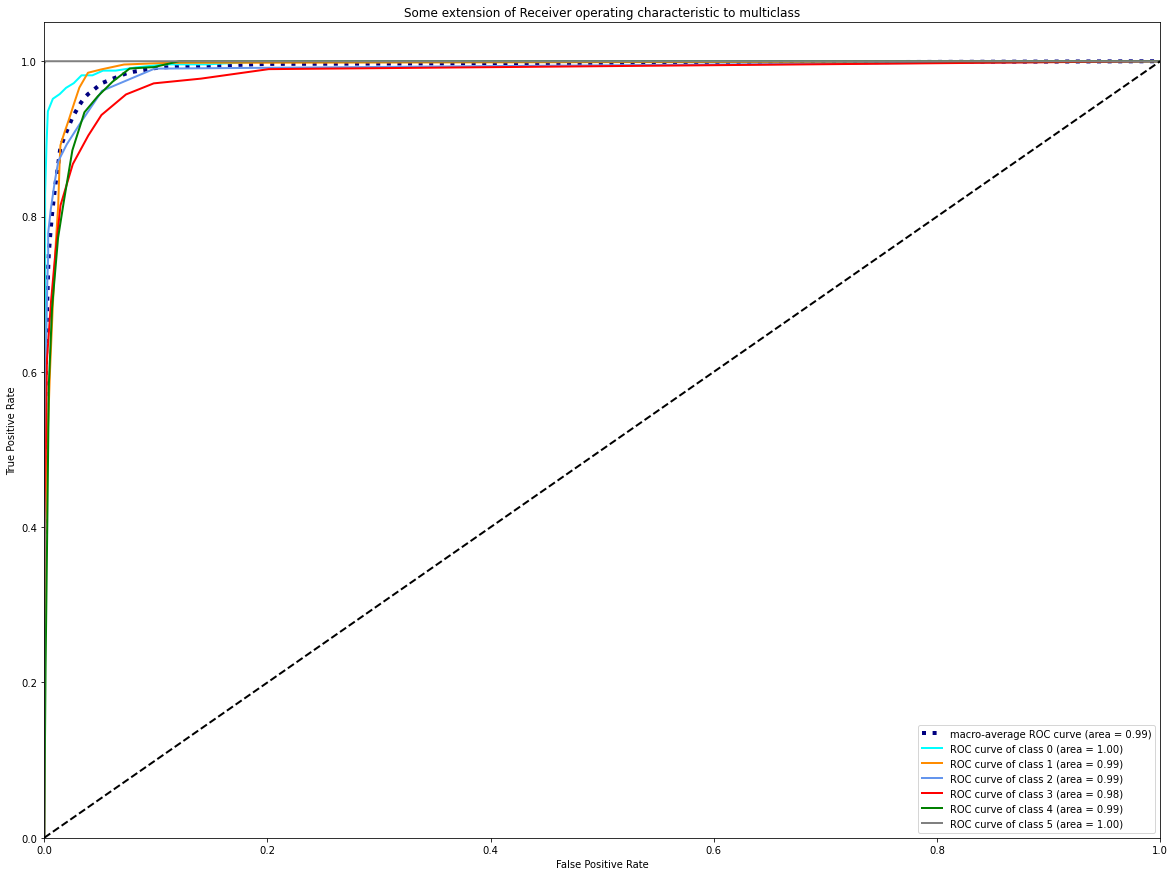

In [160]:
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([knn_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, knn_fpr[i], knn_tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

knn_fpr["macro"] = all_fpr
knn_tpr["macro"] = mean_tpr
knn_roc_auc["macro"] = auc(knn_fpr["macro"], knn_tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20, 15))
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

plt.plot(
    knn_fpr["macro"],
    knn_tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(knn_roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "green", "grey"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        knn_fpr[i],
        knn_tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, knn_roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

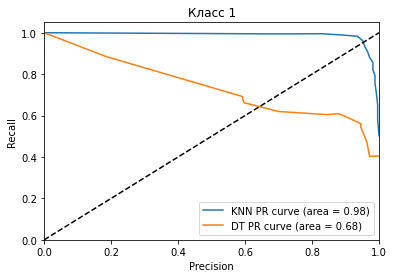

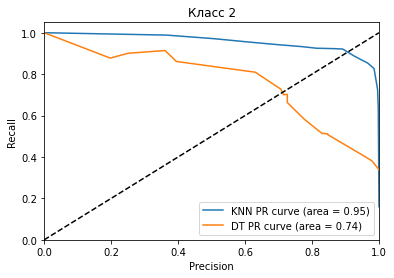

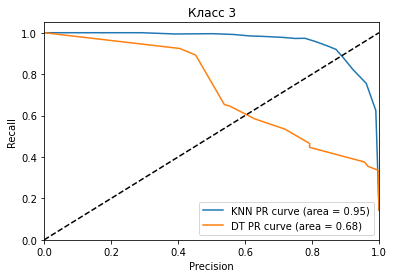

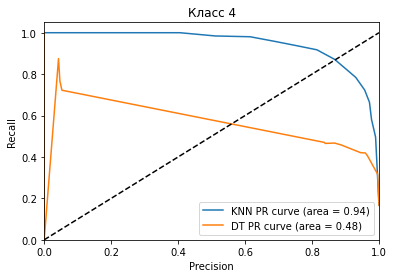

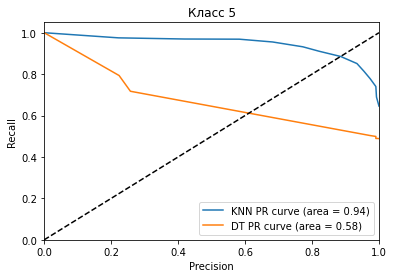

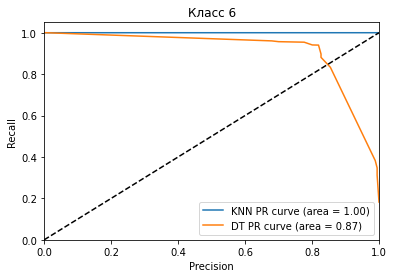

In [163]:
# Compute PR curve and PR area for each class
knn_recall = dict()
knn_precision = dict()
knn_pr_aps = dict()
dt_recall = dict()
dt_precision = dict()
dt_pr_aps = dict()
for i in range(n_classes):
    knn_precision[i], knn_recall[i], _ = precision_recall_curve(y[:, i], knn_predict_proba[:, i])
    knn_pr_aps[i] = average_precision_score(y[:, i], knn_predict_proba[:, i])
    dt_precision[i], dt_recall[i], _ = precision_recall_curve(y[:, i], dt_predict_proba[:, i])
    dt_pr_aps[i] = average_precision_score(y[:, i], dt_predict_proba[:, i])


# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(knn_recall[i], knn_precision[i], label='KNN PR curve (area = %0.2f)' % knn_pr_aps[i])
    plt.plot(dt_recall[i], dt_precision[i], label='DT PR curve (area = %0.2f)' % dt_pr_aps[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

Вывод: тестовая и обучающая выборки сбалансированы